# matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## plt.plot()

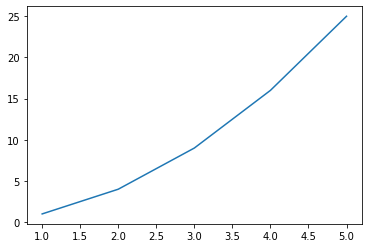

In [5]:
x = [1, 2, 3, 4, 5]
# y = [1, 4, 9, 16, 25]
y = np.array(x) ** 2
plt.plot(x, y)

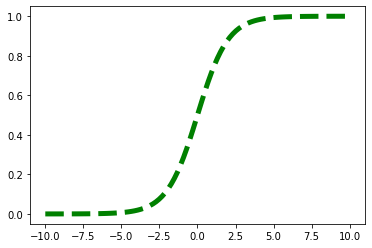

In [13]:
x = np.linspace(-10, 10, 100)
z = 1 / (1 + np.exp(-x))
plt.plot(x, z, 'g--', linewidth=5)

In [8]:
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
                  'b': [10, 15, 40, 100, 200, 400]})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Second argument 'b' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """Entry point for launching an IPython kernel.


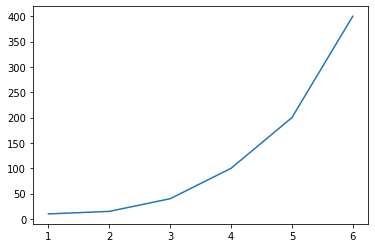

In [9]:
plt.plot('a', 'b', data=df)

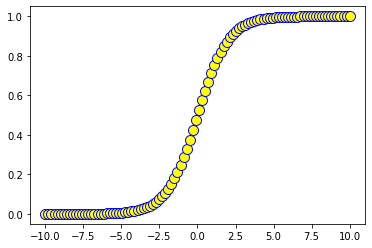

In [24]:
plt.plot(x, z,
        color='violet',
        lw=3,
        ls='--',
        marker='o',
        markersize=10,
        markerfacecolor='yellow',
        markeredgecolor='blue')

## 付属情報を付ける

([<matplotlib.axis.YTick at 0x7f07f7cdf350>,
 <a list of 3 Text yticklabel objects>)

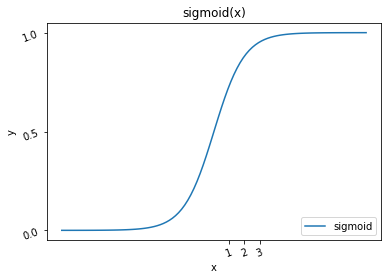

In [27]:
plt.plot(x, z, label='sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sigmoid(x)')
plt.legend(loc=4)
plt.xticks([1, 2, 3], rotation=20)
plt.yticks([0, 0.5, 1], rotation=20)

In [59]:
# csvファイルを読み込み
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
# release_dateがNaNのレコードをフィルタアウト
df = df[~df['release_date'].isna()]
# year項目を作成
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))

In [54]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,1992
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,2011
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,2013
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,2012-05-03,0,98.0,"[{""iso_63

Text(0, 0.5, 'count')

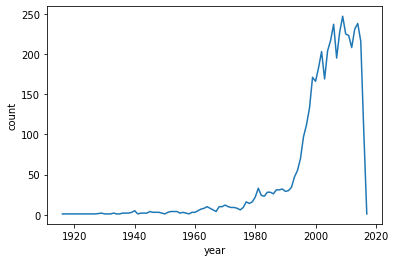

In [61]:
plt.plot(df.groupby('year').count()['id'])
plt.xlabel('year')
plt.ylabel('count')

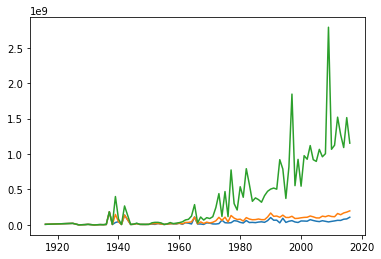

In [67]:
# revenue 推移
df = df[df['revenue']!=0]
plt.plot(df.groupby('year').median()['revenue'], label='median')
plt.plot(df.groupby('year').mean()['revenue'], label='mean')
plt.plot(df.groupby('year')['revenue'].max(), label='max')

## 複数のグラフを描画する

### 1,plt.subplotを使う

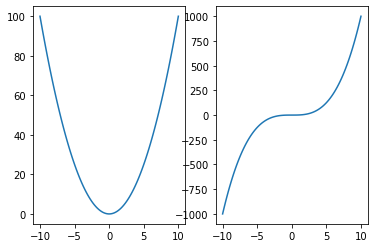

In [71]:
x = np.linspace(-10, 10, 100)
plt.subplot(1, 2, 1)
plt.plot(x, x**2)

plt.subplot(1, 2, 2)
plt.plot(x, x**3)

### plt.figure()を使う

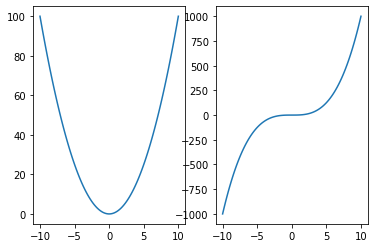

In [73]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, x**2)
ax2.plot(x, x**3)

### plt.subplots()

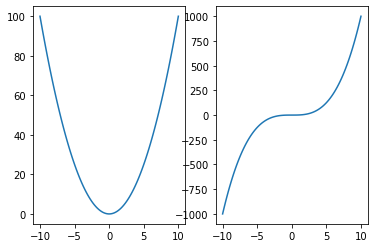

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, x**2)
axes[1].plot(x, x**3)

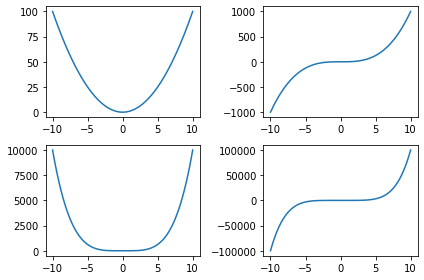

In [84]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, x**2)
axes[0, 1].plot(x, x**3)
axes[1, 0].plot(x, x**4)
axes[1, 1].plot(x, x**5)
fig.tight_layout()